In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline



import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
"""import plotly.graph_objs as go
import plotly.plotly as py"""
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=af171b10a548fb818f284d8f0bccdec9578aaac02de11e882929bca541133619
  Stored in directory: c:\users\nvmuk\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [2]:
data = pd.read_csv(r"E:\DS workspace\ML DL Python\Project\chat corpus\rnn text classfication\counsel_chat.csv")
data.head()

,questionTitle,questionText,topic,answerText
0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,depression,"If everyone thinks you're worthless, then mayb..."
1,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,depression,"Hello, and thank you for your question and see..."
2,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,depression,First thing I'd suggest is getting the sleep y...
3,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,depression,Therapy is essential for those that are feelin...
4,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,depression,I first want to let you know that you are not ...


In [3]:
data.columns

Index(['questionTitle', 'questionText', 'topic', 'answerText'], dtype='object')

In [4]:
data_q = data[["questionText","topic"]]
data_q.head()

,questionText,topic
0,I'm going through some things with my feelings...,depression
1,I'm going through some things with my feelings...,depression
2,I'm going through some things with my feelings...,depression
3,I'm going through some things with my feelings...,depression
4,I'm going through some things with my feelings...,depression


In [85]:
data_a = data[["answerText","topic"]]
data_a.head()

,answerText,topic
0,"If everyone thinks you're worthless, then mayb...",depression
1,"Hello, and thank you for your question and see...",depression
2,First thing I'd suggest is getting the sleep y...,depression
3,Therapy is essential for those that are feelin...,depression
4,I first want to let you know that you are not ...,depression


In [82]:
data_q["topic"].value_counts()

depression                  330
anxiety                     249
counseling-fundamentals     240
intimacy                    205
relationships               174
parenting                   145
family-conflict             116
self-esteem                  83
relationship-dissolution     76
trauma                       66
behavioral-change            51
marriage                     46
lgbtq                        38
anger-management             38
substance-abuse              35
spirituality                 34
professional-ethics          32
workplace-relationships      26
diagnosis                    22
domestic-violence            21
social-relationships         20
grief-and-loss               18
self-harm                    11
sleep-improvement            10
eating-disorders             10
legal-regulatory              8
stress                        7
children-adolescents          6
addiction                     5
human-sexuality               4
military-issues               3
Name: to

# model for answer classification

In [58]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_a["answerText"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(data_a["answerText"].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(data_a["topic"]).values
print('Shape of label tensor:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(31, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Found 13773 unique tokens.


In [59]:
X = tokenizer.texts_to_sequences(data_a["answerText"].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2129, 250)


In [66]:
Y = pd.get_dummies(data_a["topic"]).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2129, 31)


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1916, 250) (1916, 31)
(213, 250) (213, 31)


In [72]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(31, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 31)                3131      
                                                                 
Total params: 5,083,531
Trainable params: 5,083,531
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
epochs = 30
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/30
27/27 [==============================] - 31s 908ms/step - loss: 3.1763 - accuracy: 0.1415 - val_loss: 3.0094 - val_accuracy: 0.0729
Epoch 2/30
27/27 [==============================] - 23s 857ms/step - loss: 2.8422 - accuracy: 0.1618 - val_loss: 2.9418 - val_accuracy: 0.0729
Epoch 3/30
27/27 [==============================] - 22s 833ms/step - loss: 2.8187 - accuracy: 0.1618 - val_loss: 2.9226 - val_accuracy: 0.0729
Epoch 4/30
27/27 [==============================] - 24s 882ms/step - loss: 2.8041 - accuracy: 0.1647 - val_loss: 2.9476 - val_accuracy: 0.0729
Epoch 5/30
27/27 [==============================] - 23s 871ms/step - loss: 2.7671 - accuracy: 0.1705 - val_loss: 2.9081 - val_accuracy: 0.1094
Epoch 6/30
27/27 [==============================] - 23s 869ms/step - loss: 2.6496 - accuracy: 0.2709 - val_loss: 2.8709 - val_accuracy: 0.1198
Epoch 7/30
27/27 [==============================] - 25s 917ms/step - loss: 2.4096 - accuracy: 0.3602 - val_loss: 2.7442 - val_accuracy: 0.2031

In [74]:
#model.save("modela.h5")

In [ ]:
modela = keras.models.load_model("modela.h5")

In [84]:
accr = modela.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 2s 100ms/step - loss: 4.6926 - accuracy: 0.1784
Test set
  Loss: 4.693
  Accuracy: 0.178


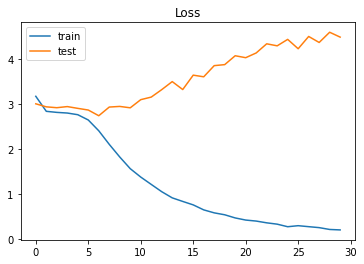

In [75]:
"""plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();"""

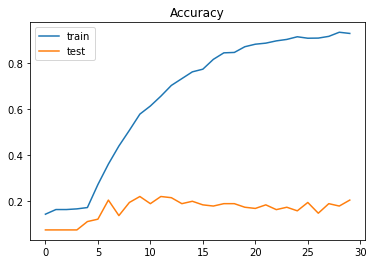

In [77]:
"""plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();"""

In [113]:
def preda(x):
    new_complaint = [x]
    seq = tokenizer.texts_to_sequences(new_complaint)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    labels = ["depression","anxiety","counseling-fundamentals","intimacy","relationships","parenting","family-conflict","self-esteem","relationship-dissolution",
    "trauma","behavioral-change","marriage","lgbtq","anger-management","substance-abuse","spirituality","professional-ethics",
    "workplace-relationships","diagnosis","domestic-violence","social-relationships","grief-and-loss","self-harm","sleep-improvement","eating-disorders",
    "legal-regulatory","stress","children-adolescents","addiction","human-sexuality","military-issues"] 
    print(pred, labels[np.argmax(pred)])

In [92]:
pred("My boyfriend and I have been together for five years now. Throughout the entire first day that we met, he and I had the opportunity to interact quite a lot and instantly sparked a deep connection with one another. That same night, he and a friend stayed over at my house (without my mom's acknowledgment) and we kissed. The next two days were a repetition of the first day. On the third night, my mother finally caught us, and I was kicked out of my house. I left with him of course, and we went from meeting each other to being like a married couple. It was very hard for us. His stepdad also kicked him out of his home, and we were staying at cheap hotels and friend's houses with the little money we had. I quit my job and dropped out of school because it was hard to do anything without a stable home. There were times when we had nowhere else to go but sleep in the car outside a Walmart parking lot. Our honeymoon stage, as they call it, probably only lasted one month. After that, it was a downward spiral. We were constantly arguing about money, food, and our families. We kept having the famous you're doing it wrongâ€”do it this way argument. After six months, we moved across the country only to live the same thing, and that's when the violence started. One afternoon, after a serious argument, he got into his truck and threatened to leave me. I was frightened that he would actually go through with his word, given that we had just moved to a place where we knew no one. He told me to let him leave or he would hit me. He had once promised he would never touch me, so I challenged him to do it. He slapped me, and ever since that time, when we have serious fights, he loses control and hurts me. I haven't had the courage to leave him, and there's really nothing stopping me now. I don't live with him, I don't depend on him, and we don't have children. We both haven't been able to let go of that deep connection that we still have and that has been damaged so badly. He always apologizes, and at the beginning, he was more willing to change. Now he just wants me to understand why he does it and how I don't ever make the effort to try to be okay. I've read enough about domestic violence to know that it's not my fault that he loses control, so that's not even an issue for me. I know he has to change that on his own. I just want to know if there's people who have gone through this and had the tables turned? Is there hope for a better future together?")

1/1 [==============================] - 0s 85ms/step
[[4.5332985e-05 1.8912890e-03 6.6311834e-03 1.7553921e-03 4.6470674e-04
  1.9804733e-03 1.4002335e-04 1.4667857e-03 1.5107869e-02 2.8849606e-04
  5.5928850e-03 4.5671067e-04 3.8016654e-04 1.3159362e-02 1.9629719e-03
  1.9745375e-03 6.5247834e-02 6.7745231e-04 6.3529389e-04 4.0711250e-02
  7.2367750e-02 6.5759319e-01 2.3758916e-02 3.8824124e-05 9.8624019e-05
  2.9709623e-03 2.8483570e-02 4.7275709e-05 2.3278130e-04 5.4455800e-03
  4.8392531e-02]] grief-and-loss


In [ ]:
https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [ ]:
def RNNmodel():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(31,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model



model = RNNmodel()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10, validation_split=0.2)